CMSC:320 Project 1
Annie Smith

In [ ]:
pip install requests pandas numpy  beautifulsoup4;

Imports:

In [189]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import numpy as np
import math
import re
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime

**PART** **1**

Step 1: 
First use a request to get the URL and use BeautifulSoup to parse the data in html.
Rename the columns

In [418]:
r = requests.get('https://cmsc320.github.io/files/top-50-solar-flares.html');#
root = BeautifulSoup(r.content); 
soup = BeautifulSoup(r.text, 'html.parser')
table = soup.find('table' , {'class' : "table table-striped table-responsive-md"})
df = pd.read_html(str(table))
df = df[0]
df.columns = ['rank' ,'xclass' , 'date', 'region',\
                   'start_time', 'max_time' ,'end_time', 'movie'];




Step 2: Drop the last column, and combine rows in order to create datetime objects. Missing values are recorded as NaN

In [419]:
df.drop(['movie'], axis = 1 , inplace = True);    
df["start_datetime"] = pd.to_datetime(df["date"]+ " " + df["start_time"])
df["max_datetime"] = pd.to_datetime(df["date"] + " " + df["max_time"])
df["end_datetime"] = pd.to_datetime(df["date"] + " " + df["end_time"])
df.drop( columns = ["start_time", "end_time", "max_time" , "date"]\
         , inplace = True);
df.region.replace("-", None, inplace = True)

In [343]:
df

,rank,xclass,region,start_datetime,max_datetime,end_datetime
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


Step 3: Get the data using a request an use Beautiful Soup to split find values and then split the lines into rows. Split each row by a space in order to create an array and convert it to a dataframe.

In [420]:
r2 = requests.get("http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html");
text = r2.text;
soup2 = BeautifulSoup(text);
split = (soup2.find('pre').get_text()).splitlines();
rows = split[12:494];
splitData = [];
for k in rows:
  splitData.append(k.split());
df2 = pd.DataFrame(splitData);



Step 4: Any missing entries are recorded as NaN. New rows are created to determine which rows have a Halo. The width row has a lower bounds, they are removed. Datetime objects in this section are also combined.

In [421]:
df2.drop( columns = [14, 15, 16 , 17 , 18, 19, 20 , 21 , 22 , 23]\
         , inplace = True);
df2.columns = ['start_date' , 'start_time', 'end_date', 'end_time', \
               'start_frequency', 'end_frequency', 'flare_location', 'flare_region'\
               ,'flare_classification', 'cme_date', 'cme_time', 'cme_angle',\
               'cme_width', 'cme_speed'];
df2.replace("-----", np.NaN, inplace = True);
df2.replace("----", np.NaN, inplace = True);

df2.replace("--/--", np.NaN, inplace = True);
df2.replace("--:--", np.NaN, inplace = True);

df2.replace("Back", np.NaN, inplace = True);
df2.replace("BACK", np.NaN, inplace = True);
df2.replace("????", np.NaN, inplace = True);
df2.replace("FILA", np.NaN, inplace = True);
df2.replace("altr", np.NaN, inplace = True);

In [422]:
width_true = []
widthval = []
df2['is_halo'] = np.where(df2['cme_angle'] == 'Halo', True, False);
df2.replace("Halo", np.NaN, inplace = True);
for i in range(0,482):
  
  # replace any lower bound values
  if (str(df2['cme_width'][i]).find(">") == 0 ):
    width_true.append(True)
    widthval.append(str((df2['cme_width'][i])[1::]))
  else:
    width_true.append(False)
    widthval.append(df2['cme_width'][i])
df2['width_lower_bound'] = width_true;
df2['cme_width'] = widthval

end_dates = [];
cme_dates = [];

#change dates at 24:00
df2.replace("24:00", "00:00", inplace = True);

# change all dates, get the year from start datetime
for i in range(0,482):
  if (pd.isna(df2['end_date'][i]) or pd.isna(df2['end_time'][i])):
    end_dates.append(np.NaN);
  else:
     end_dates.append((df2['start_date'][i])[0:4] + "/" +\
                      df2["end_date"][i] + " " + df2["end_time"][i]);
  
  if (pd.isna(df2['cme_date'][i]) or pd.isna(df2['cme_time'][i])):
    cme_dates.append(np.NaN);
  else:
     cme_dates.append((df2['start_date'][i])[0:4] + "/" +\
                      str(df2["cme_date"][i]) + " " + str(df2["cme_time"][i]));

df2["start_datetime"] = pd.to_datetime(df2["start_date"]+ " " + df2["start_time"]);
df2['cme_datetime'] = pd.to_datetime(cme_dates);
df2["end_datetime"] = pd.to_datetime(end_dates);
df2.drop(columns = ["start_time", "start_date", "end_time","end_date", "cme_time", "cme_date"] \
         , inplace = True);


In [454]:
df2.head(20)

,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,start_datetime,cme_datetime,end_datetime,dates,num,MatchingRow
0,8000,4000,S25E16,8026,M1.3,74,79,312,False,False,1997-04-01 14:00:00,1997-04-01 15:18:00,1997-04-01 14:15:00,1997-04-01,M1.3,0
1,11000,1000,S28E19,8027,C6.8,NaN,360,878,True,False,1997-04-07 14:30:00,1997-04-07 14:27:00,1997-04-07 17:30:00,1997-04-07,C6.8,1
2,12000,80,N21W08,8038,C1.3,NaN,360,464,True,False,1997-05-12 05:15:00,1997-05-12 05:30:00,1997-05-14 16:00:00,1997-05-12,C1.3,2
3,5000,500,N05W12,8040,M1.3,263,165,296,False,False,1997-05-21 20:20:00,1997-05-21 21:00:00,1997-05-21 22:00:00,1997-05-21,M1.3,3
4,6000,2000,S29E25,8088,C1.4,133,155,712,False,False,1997-09-23 21:53:00,1997-09-23 22:02:00,1997-09-23 22:16:00,1997-09-23,C1.4,4
5,14000,250,S20W13,8100,C8.6,240,109,227,False,False,1997-11-03 05:15:00,1997-11-03 05:28:00,1997-11-03 12:00:00,1997-11-03,C8.6,5
6,14000,5000,S16W21,8100,M4.2,233,122,352,False,False,1997-11-03 10:30:00,1997-11-03 11:11:00,1997-11-03 11:30:00,1997-11-03,M4.2,6
7,14000,100,S14W33,8100,X2.1,NaN,360,785,True,False,1997-11-04 06:00:00,1997-11-04 06:10:00,1997-11-05 04:30:00,1997-11-04,X2.1,7
8,14000,100,S18W63,8100,X9.4,NaN,360,1556,True,False,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,1997-11-06,X9.4,8
9,14000,7000,N17E63,8113,X2.6,98,91,441,False,False,1997-11-27 13:30:00,1997-11-27 13:56:00,1997-11-27 14:00:00,1997-11-27,X2.6,9


**PART 2**

QUESTION 1: Create a copy of the dataframe and sort the NASA daya by the decsending alphabetical order and desceneding numerical order within the class.

In [455]:
df3 = df2.copy()
df3['class_letter'] = df3['flare_classification'].str[0];
df3['number'] = df3['flare_classification'].str[1:].astype(float);
df3.sort_values(by =['class_letter' , 'number'], ascending = [False, False], inplace = True);
df3.drop( columns = ["class_letter", "number"]\
         , inplace = True);

In [456]:
top50 = (df3[0:50]).copy()

print(top50[['flare_classification', 'start_datetime', 'cme_datetime','end_datetime' ,'flare_region']])
top50['ran'] = range(0,50)
top50 = top50.set_index(top50['ran'])

    flare_classification      start_datetime        cme_datetime  \
240                 X28. 2003-11-04 20:00:00 2003-11-04 19:54:00   
117                 X20. 2001-04-02 22:05:00 2001-04-02 22:06:00   
233                 X17. 2003-10-28 11:10:00 2003-10-28 11:30:00   
126                 X14. 2001-04-15 14:05:00 2001-04-15 14:06:00   
234                 X10. 2003-10-29 20:55:00 2003-10-29 20:54:00   
8                   X9.4 1997-11-06 12:20:00 1997-11-06 12:10:00   
328                 X9.0 2006-12-05 10:50:00                 NaT   
237                 X8.3 2003-11-02 17:30:00 2003-11-02 17:30:00   
288                 X7.1 2005-01-20 07:15:00 2005-01-20 06:54:00   
359                 X6.9 2011-08-09 08:20:00 2011-08-09 08:12:00   
331                 X6.5 2006-12-06 19:00:00                 NaT   
317                 X6.2 2005-09-09 19:45:00 2005-09-09 19:48:00   
82                  X5.7 2000-07-14 10:30:00 2000-07-14 10:54:00   
121                 X5.6 2001-04-06 19:35:00 200

In [457]:
df

,rank,xclass,region,start_datetime,max_datetime,end_datetime,dates,num,MatchingRow
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,2003-11-04,X28,240.0
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,2001-04-02,X20,116.0
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,2003-10-28,X17.2,117.0
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,2005-09-07,X17,233.0
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,2001-04-15,X14.4,316.0
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,2003-10-29,X10,126.0
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,1997-11-06,X9.4,234.0
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2017-09-06,X9.3,8.0
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,2006-12-05,X,NaN
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,2003-11-02,X8.3,328.0


The data is similar in a lot of cases, but sometimes is off in the class by a couple decimal points. Additionally, the regions in the NASA table have extra numbers. The time are usually off as well.

QUESTION 2: Find the best match first by looking at the dates. The date would give the best match. Then look at the class for any remaining dates. If there are any NaN values, there is no match for that set. After this, add the rank in the NASA dataset from the SpaceWeatherLive website for the corresponding rows.

In [458]:
datesolar = []
regsolar = []
numsolar = []
for i in range(0,50):
  reg = re.search("(\w)(\d.*\d)*", df.xclass[i]);
  regsolar.append(reg[1]);
  numsolar.append(reg[0]);
  datesolar.append((df['start_datetime'][i]).strftime('%Y-%m-%d'));

size = len(df2)
datenasa = []
regnasa = []
numnasa = []
for i in range(0,size):
  reg = re.search("(\w)(\d.*\d)*", str(df2.flare_classification[i]));
  regnasa.append(reg[1]);
  numnasa.append(reg[0]);
  datenasa.append((df2['start_datetime'][i]).strftime('%Y-%m-%d'));
df['dates'] =  pd.to_datetime(datesolar)
df2['dates'] = pd.to_datetime(datenasa)
df['num'] = numsolar
df2['num'] = numnasa
newdf2 = df2[['num', 'dates']].copy()
newdf2['row'] = df2.index

In [459]:
matching = []
matchingDate = df.merge(newdf2, how = 'left', on = 'dates')
matchingNum = df.merge(newdf2, how = 'left', on = 'num')
print(matchingDate)
matchingNum

    rank  xclass  region      start_datetime        max_datetime  \
0      1    X28+     486 2003-11-04 19:29:00 2003-11-04 19:53:00   
1      2    X20+    9393 2001-04-02 21:32:00 2001-04-02 21:51:00   
2      2    X20+    9393 2001-04-02 21:32:00 2001-04-02 21:51:00   
3      3  X17.2+     486 2003-10-28 09:51:00 2003-10-28 11:10:00   
4      4    X17+     808 2005-09-07 17:17:00 2005-09-07 17:40:00   
5      5   X14.4    9415 2001-04-15 13:19:00 2001-04-15 13:50:00   
6      6     X10     486 2003-10-29 20:37:00 2003-10-29 20:49:00   
7      7    X9.4    8100 1997-11-06 11:49:00 1997-11-06 11:55:00   
8      8    X9.3    2673 2017-09-06 11:53:00 2017-09-06 12:02:00   
9      9      X9     930 2006-12-05 10:18:00 2006-12-05 10:35:00   
10    10    X8.3     486 2003-11-02 17:03:00 2003-11-02 17:25:00   
11    10    X8.3     486 2003-11-02 17:03:00 2003-11-02 17:25:00   
12    11    X8.2    2673 2017-09-10 15:35:00 2017-09-10 16:06:00   
13    12    X7.1     720 2005-01-20 06:36:00 200

,rank,xclass,region,start_datetime,max_datetime,end_datetime,dates_x,num,MatchingRow,dates_y,row
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,2003-11-04,X28,240.0,2003-11-04,240.0
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,2001-04-02,X20,116.0,2001-04-02,117.0
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,2003-10-28,X17.2,117.0,NaT,NaN
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,2005-09-07,X17,233.0,2003-10-28,233.0
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,2001-04-15,X14.4,316.0,NaT,NaN
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,2003-10-29,X10,126.0,2003-10-29,234.0
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,1997-11-06,X9.4,234.0,1997-11-06,8.0
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2017-09-06,X9.3,8.0,NaT,NaN
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,2006-12-05,X,NaN,NaT,NaN
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,2003-11-02,X8.3,328.0,2003-11-02,237.0


In [460]:
bestRow = []
for i in range(0,50):
  if(pd.isna(matchingDate.num_y[i]) or bestRow.count(matchingNum.row[i] != 0)):
    bestRow.append(matchingNum.row[i])
  else:
    bestRow.append(matchingDate.row[i])


In [461]:
df['MatchingRow'] = bestRow

In [462]:
dfrank = df[['MatchingRow', 'rank']]
df2['MatchingRow'] = df2.index

In [463]:
dfrank = dfrank.dropna()

In [465]:
merged = df2.merge(dfrank, how = 'left' , on = 'MatchingRow')
df2.drop(columns = ['MatchingRow'])
merged.drop(columns = ['MatchingRow'])
merged.head(20)

,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,start_datetime,cme_datetime,end_datetime,dates,num,MatchingRow,rank
0,8000,4000,S25E16,8026,M1.3,74,79,312,False,False,1997-04-01 14:00:00,1997-04-01 15:18:00,1997-04-01 14:15:00,1997-04-01,M1.3,0,NaN
1,11000,1000,S28E19,8027,C6.8,NaN,360,878,True,False,1997-04-07 14:30:00,1997-04-07 14:27:00,1997-04-07 17:30:00,1997-04-07,C6.8,1,NaN
2,12000,80,N21W08,8038,C1.3,NaN,360,464,True,False,1997-05-12 05:15:00,1997-05-12 05:30:00,1997-05-14 16:00:00,1997-05-12,C1.3,2,NaN
3,5000,500,N05W12,8040,M1.3,263,165,296,False,False,1997-05-21 20:20:00,1997-05-21 21:00:00,1997-05-21 22:00:00,1997-05-21,M1.3,3,NaN
4,6000,2000,S29E25,8088,C1.4,133,155,712,False,False,1997-09-23 21:53:00,1997-09-23 22:02:00,1997-09-23 22:16:00,1997-09-23,C1.4,4,NaN
5,14000,250,S20W13,8100,C8.6,240,109,227,False,False,1997-11-03 05:15:00,1997-11-03 05:28:00,1997-11-03 12:00:00,1997-11-03,C8.6,5,NaN
6,14000,5000,S16W21,8100,M4.2,233,122,352,False,False,1997-11-03 10:30:00,1997-11-03 11:11:00,1997-11-03 11:30:00,1997-11-03,M4.2,6,NaN
7,14000,100,S14W33,8100,X2.1,NaN,360,785,True,False,1997-11-04 06:00:00,1997-11-04 06:10:00,1997-11-05 04:30:00,1997-11-04,X2.1,7,NaN
8,14000,100,S18W63,8100,X9.4,NaN,360,1556,True,False,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,1997-11-06,X9.4,8,8.0
9,14000,7000,N17E63,8113,X2.6,98,91,441,False,False,1997-11-27 13:30:00,1997-11-27 13:56:00,1997-11-27 14:00:00,1997-11-27,X2.6,9,NaN


QUESTION 3:
1. Plot the Start Frequency v. the time, and use a 1 to signify when the frequency is from an entry in the top 50 classification.

In [466]:
toprow = []
for i in df2.index:
  if list(df3.head(50).index).count(i):
      toprow.append(1)
  else:
    toprow.append(0)

df2['toprow'] = toprow

Text(0.5, 1.0, 'Starting Frequency v Time')

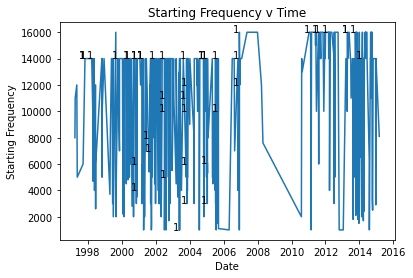

In [467]:
x  = df2['start_datetime'];
y = pd.to_numeric(df2['start_frequency']);
plt.plot(x, y)
for i, txt in enumerate(df2['toprow']):
  if(df2['toprow'][i] != 0 ):
    plt.annotate(txt, (x[i], y[i]), ha = 'right')

#labels
plt.xlabel("Date")
plt.ylabel("Starting Frequency")
plt.title("Starting Frequency v Time")


2. Sum up the proportions of the data of halos in the top 50 entries, versus the proportion for the data set in its entirety. Graph them as a bar plot.

In [468]:
sum50 = 0;
for i in range(0,50):
  if (top50.is_halo)[i]:
    sum50 += 1;

size = len(df2)
sum = 0;
for i in range(0, size):
  if df2.is_halo[i]:
    sum += 1;

sums = []
sums.append((sum50/50.0))
sums.append((sum/size))

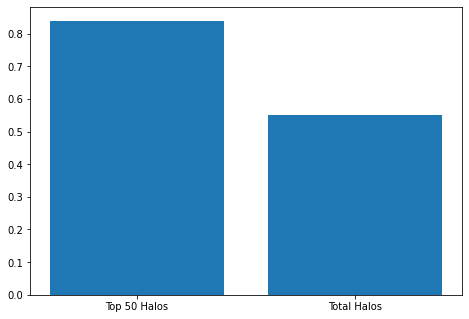

Text(3.200000000000003, 0.5, 'Proportion of Flares with Halos Over Total Flares')

In [469]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Top 50 Halos' , 'Total Halos'],sums)
plt.show()

#labels
ax.set_title("Halo CMEs in Top 50 Flares vs. Dataset as a Whole.")
ax.set_ylabel("Proportion of Flares with Halos Over Total Flares")

3. Plot the flares per month, with labels indicating the number of flares in the top 50 for that month.
a.) The intent is to show the periods in which flares are more prevalent.
c.) The plot shows the monthly flares, with a label that diplays how many of those flares were ones within the top 50.
d.) There are cycles / periods with many flares, and often the periods with lots of flares have the flares that are strong (top 50) within them. top 50 flares do not seem to occur in months that have very little other flares.


In [470]:
 size = len(df2)
 month = []
 for i in range(0, size):
   month.append((df2['start_datetime'][i]).strftime('%Y-%m'))

df2['month'] = pd.to_datetime(month)
df2.sort_values('month')
date = datetime.datetime(1997, 4, 1) + relativedelta(months=1)
df4 = df2.copy()
dfmonth = []
dfsum = []
index = []
toprow = []

while date < datetime.datetime(2021,2,1):
  top = 0 
  dfsum.append(len(df4[df4['start_datetime'] < date]))
  dfmonth.append(date - relativedelta(months=1))
  for i in (df4[df4['start_datetime'] < date]).index:
    if list(df3.head(50).index).count(i):
      top = top + 1;
  toprow.append(top)
  df4 = df4[df4['start_datetime'] > date]
  
  date = date + relativedelta(months=1)
  

dffreq = pd.DataFrame()
dffreq['month'] = dfmonth
dffreq['sum'] = dfsum
dffreq['top'] = toprow

Text(0.5, 1.0, 'Flares Each Month')

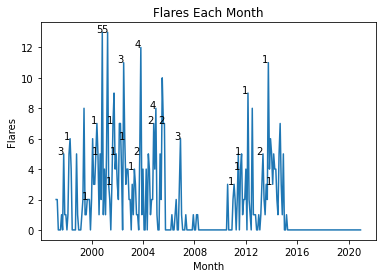

In [471]:
x  = dffreq['month'];
y = dffreq['sum'];
plt.plot(x, y)
for i, txt in enumerate(dffreq['top']):
  if(dffreq['top'][i] != 0 ):
    plt.annotate(txt, (x[i], y[i]), ha = 'right')
    
# labels 
plt.xlabel("Month")
plt.ylabel("Flares")
plt.title("Flares Each Month")